## 1. 数据处理和分析

### 1.1 数据预处理

读取从 [UN Comtrade Database](https://comtrade.un.org/data/) 获取的 2019 年全球铜及其精炼物（2603）贸易记录，并处理：

1. 去除贸易对象为 World 的数据行
2. 并保留关心的数据列：报告者及其代码、贸易对象及代码、贸易类型、贸易额

**！注**：数据中上报者（Reporter）可能包含国家和地区以及**中国**港澳台地区，为方便起见以下统称“国家”.

In [1]:
from src.modules.data import Data

data = Data("src/data/2019-world-copper-2063-trade.csv")
data.data

,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
2,31,Azerbaijan,702,Singapore,Export,419159
3,31,Azerbaijan,757,Switzerland,Export,3043343
4,31,Azerbaijan,826,United Kingdom,Import,79
5,31,Azerbaijan,860,Uzbekistan,Export,17248944
6,31,Azerbaijan,899,"Areas, nes",Import,1007
...,...,...,...,...,...,...
1146,682,Saudi Arabia,699,India,Export,119513031
1147,682,Saudi Arabia,784,United Arab Emirates,Import,133847
1148,682,Saudi Arabia,842,USA,Import,678083
1150,804,Ukraine,156,China,Import,3199


### 1.2 数据分析与检验

1. 获取贸易参与者

In [2]:
allParticipants = data.getAllParticipants()
allReporters = data.getAllReporters()
allPartners = data.getAllPartners()


print("上报进贸易记录的国家总数（不含重复）: ", allReporters.shape[0])
print("上报进贸易记录的中的贸易对象国家总数（不含重复）: ", allPartners.shape[0])
print("上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）: ", allParticipants.shape[0])

上报进贸易记录的国家总数（不含重复）:  89
上报进贸易记录的中的贸易对象国家总数（不含重复）:  109
上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）:  119


2. 数据检验

从上面数据可以看出，各国上报的记录显然是有出入的，即上报记录中涉及的国家数要比上报数据的国家数多，这至少说明了一些参与了贸易的国家没有上报贸易记录

下面以中国上报的记录为例检查和说明：

        1. 查看中国上报的进口记录

In [3]:
chinaImportLog = data.getCountryLog(156, "Import")
partnerNum1 = chinaImportLog.shape[0]

print("中国上报的进口记录中，涉及出口国家的个数: ", partnerNum1)
chinaImportLog.head(partnerNum1)

中国上报的进口记录中，涉及出口国家的个数:  56


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
247,156,China,8,Albania,Import,17013004
248,156,China,36,Australia,Import,1666113958
250,156,China,51,Armenia,Import,510563982
251,156,China,68,Bolivia (Plurinational State of),Import,2677980
252,156,China,76,Brazil,Import,557705819
255,156,China,100,Bulgaria,Import,50
256,156,China,104,Myanmar,Import,2850825
258,156,China,124,Canada,Import,910149220
260,156,China,152,Chile,Import,12076025483
261,156,China,170,Colombia,Import,56382455


        2. 查看中国进口对象上报的对中国的出口记录

In [4]:
exportToChinaLog = data.getCountryLog(156, "Export", "parter")
partnerNum2 = exportToChinaLog.shape[0]

print("全球上报了对中国有出口记录的国家", partnerNum2)
exportToChinaLog.head(partnerNum2)


全球上报了对中国有出口记录的国家 43


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
13,36,Australia,156,China,Export,1585564428
36,51,Armenia,156,China,Export,174415305
68,68,Bolivia (Plurinational State of),156,China,Export,3882938
88,76,Brazil,156,China,Export,442971407
116,100,Bulgaria,156,China,Export,71216190
161,124,Canada,156,China,Export,764979617
208,152,Chile,156,China,Export,9649325301
316,170,Colombia,156,China,Export,40352028
328,204,Benin,156,China,Export,1708
334,218,Ecuador,156,China,Export,3562481


对比上面两个表格，显然各国出入口数据是**普遍**有出入的：

首先，进出口对象数量上就不一致：中国上报记录中显示，中国 2019 年共从 56 个国家进口铜资源；而只有 43 个国家上报了对中国出口铜资源的记录

其次，对于有些进出口双方都上报了记录的情况，双方上报的贸易金额不一致，有的甚至出入较大

这可能是有以下的原因导致的：

1. 由于政策和统计方法不同导致的上报数据的结果不同. 
2. 由于货物在进出口过程中经第三方国家中转，而进出口国家对于出入口的目标国家登记不一致导致.
3. 其他可能原因.

## 2. 构建网络

根据以上数据和分析，构建网络：

1. 以国家为节点，进出口关系为指向（出口国 -> 进口国），构建有向无权图

2. 对于进出口关系，忽略各个国家之间上报数据的差异，即只要在任何一条记录中出现进出口关系即双方存在贸易关系，则为对应节点添加连边

In [5]:
from src.modules.network import Net

net = Net(data)
G = net.G

绘制网络：

In [6]:
# net.draw()

## 3. 基于连接信息熵的节点重要性

### 3.1 定义

#### 3.1.1 连接度 $A_i$
定义有向加权网络中节点的连接度为
$$
A_i = \theta\sum_{j\in \Gamma_{i\_in}}k_j + (1-\theta)\sum_{j\in \Gamma_{i\_out}}k_j
$$

其中 $\Gamma_{i\_in}$ 是指向节点 $i$ 的邻居节点集，$\Gamma_{i\_out}$ 是由节点 $i$ 指向的邻居节点集；$k_j$ 是对应节点的度；$\theta \in [0,1]$ 是参数.

具体地，有向加权网络中，定义节点 $k_j$ 的度为：

$$
\begin{aligned}
k_j &= \lambda k_i^{in} + (1-\lambda)k_i^{out} \\
    &= \lambda \sum_{i=1}^m w_{ij} + (1 - \lambda)\sum_{i=1}^m w_{ji}
\end{aligned}
$$

其中 $w_{uv}$ 表示由节点 $u$ 指向节点 $v$ 的边的权重，若该边不存在则记为 $0$；$\lambda$ 为出入边的权重参数.

具体地上式表示，在节点 $j$ 与其邻居节点的连边中，按权重求出入连边的权重和.

#### 3.1.2 连边概率 $P_{i_j}$

定义连边概率 $P_{i_j}$ 为节点 $i$ 被其邻居节点 $j$ 选择进行连边的概率：
$$
P_{i_j} = \frac{k_i}{A_j}, \ \ \ \ (j\in\Gamma_i)
$$

#### 3.1.3 连接信息熵 $E_i$

定义有向网络中连接信息熵如下：

$$
E_i = \sum\limits_{j\in\Gamma_j}\left| P_{i_j}\log_2 P_{i_j} \right|
$$

*这里取绝对值是因为 $\theta$ 加权的原因，$P_{i_j}$ 可能大于 $1$*

In [7]:
def getStrength(G, node, l = 0.75):
    in_edges = G.in_edges(node, data="weight")
    out_edges = G.out_edges(node, data="weight")

    in_strength = sum([data[2] for data in in_edges])
    out_strength = sum([data[2] for data in out_edges])

    return l * in_strength + (1 - l) * out_strength

In [8]:
def getAdjacencyDegree(G, node, theta = 0.75, l = 0.75):
    successors = G.successors(node)
    predecessors = G.predecessors(node)

    in_degree = sum([ getStrength(G, node, l) for node in predecessors ])
    out_degree = sum([ getStrength(G, node, l) for node in successors ])

    return theta * in_degree + (1 - theta) * out_degree

In [9]:
def getSelectionProbability(G, i, j, l = 0.75, theta = 0.75):
    return getStrength(G, i, l) / getAdjacencyDegree(G, j, theta, l)

In [10]:
import math

def getAdjacencyEntropy(G, i, l=0.75, theta=0.75):
    successors = G.successors(i)
    predecessors = G.predecessors(i)

    neighbors = set((*successors, *predecessors))
    
    E = 0

    for neighbor in neighbors:
        p = getSelectionProbability(G, i, neighbor)
        E += abs(p * math.log(p, 2))

    return E

In [11]:
import networkx as nx

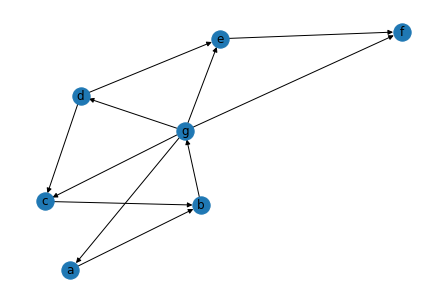

In [12]:
tG = nx.DiGraph()

tG.add_edge('a','b', weight=1)
tG.add_edge('g','a', weight=1)
tG.add_edge('b','g', weight=1)
tG.add_edge('c','b', weight=1)
tG.add_edge('g','c', weight=1)
tG.add_edge('g','f', weight=1)
tG.add_edge('g','d', weight=1)
tG.add_edge('g','e', weight=1)
tG.add_edge('e','f', weight=1)
tG.add_edge('d','e', weight=1)
tG.add_edge('d','c', weight=1)

nx.draw(tG, with_labels=True)

In [13]:
getSelectionProbability(tG, 'a', 'b')

0.3902439024390244

In [14]:
getSelectionProbability(tG, 'a', 'g')

0.32

In [15]:
getAdjacencyEntropy(tG, 'a')

1.0558103727739936

In [16]:
getAdjacencyEntropy(G, 31)

0.0696289402277759

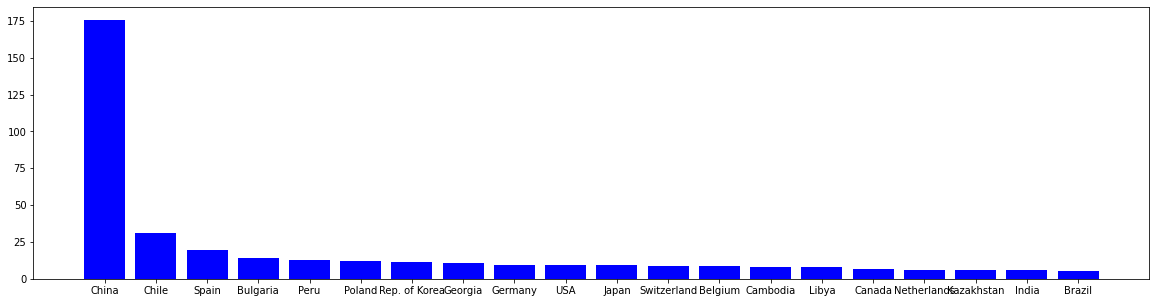

In [17]:
net.drawEntropiesBar()